In [39]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid

In [40]:
df= pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\NOTES\Smart_irrigation_system\dataset.csv")
print("data read successfully")
print(df)
df.keys()

data read successfully
     moisture  temp  humidity  pump
0         638    16        45     1
1         522    18        64     1
2         741    22        68     1
3         798    32        90     0
4         690    28        82     1
..        ...   ...       ...   ...
195       941    13        73     1
196       902    45        97     0
197       894    42        89     1
198      1022    45        92     1
199       979    10        86     1

[200 rows x 4 columns]


Index(['moisture', 'temp', 'humidity', 'pump'], dtype='object')

In [41]:
df.head()

,moisture,temp,humidity,pump
0,638,16,45,1
1,522,18,64,1
2,741,22,68,1
3,798,32,90,0
4,690,28,82,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   moisture  200 non-null    int64
 1   temp      200 non-null    int64
 2   humidity  200 non-null    int64
 3   pump      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [43]:
df.describe()

,moisture,temp,humidity,pump
count,200.000000,200.000000,200.000000,200.000000
mean,633.085000,27.750000,76.810000,0.630000
std,279.077118,10.869602,15.082483,0.484016
min,4.000000,10.000000,25.000000,0.000000
25%,500.500000,18.000000,66.000000,0.000000
50%,693.500000,28.000000,77.000000,1.000000
75%,850.750000,38.000000,89.250000,1.000000
max,1022.000000,45.000000,100.000000,1.000000


In [44]:
df.isnull().sum()

moisture    0
temp        0
humidity    0
pump        0
dtype: int64

In [45]:
df.corr()

,moisture,temp,humidity,pump
moisture,1.000000,-0.045969,-0.053405,0.645572
temp,-0.045969,1.000000,0.477269,-0.231625
humidity,-0.053405,0.477269,1.000000,-0.379327
pump,0.645572,-0.231625,-0.379327,1.000000


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'pump')

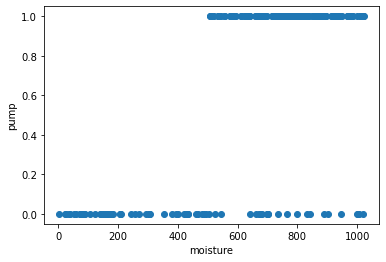

In [47]:
plt.scatter(df['moisture'],df['pump'])
plt.xlabel('moisture')
plt.ylabel('pump')


Text(0, 0.5, 'pump')

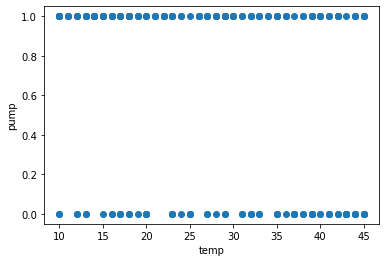

In [48]:
plt.scatter(df['temp'],df['pump'])
plt.xlabel('temp')
plt.ylabel('pump')

Text(0, 0.5, 'pump')

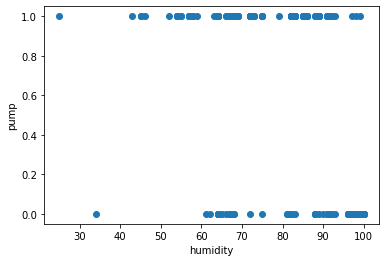

In [49]:
plt.scatter(df['humidity'],df['pump'])
plt.xlabel('humidity')
plt.ylabel('pump')

<AxesSubplot:xlabel='moisture', ylabel='pump'>

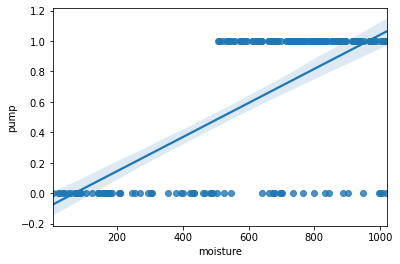

In [50]:
import seaborn as sns
sns.regplot(x="moisture" ,y="pump",data=df)

In [51]:
#dividing features into independent and dependent
#price is dependent and others are independent
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [52]:
X.head()


,moisture,temp,humidity
0,638,16,45
1,522,18,64
2,741,22,68
3,798,32,90
4,690,28,82


In [53]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: pump, dtype: int64

In [54]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
X_train

,moisture,temp,humidity
169,999,30,75
97,837,30,67
31,546,32,100
12,507,45,92
35,796,21,54
...,...,...,...
106,379,23,64
14,703,45,96
92,795,15,83
179,937,28,82


In [56]:
X_test


,moisture,temp,humidity
95,843,41,92
15,716,25,64
30,661,35,99
158,865,17,67
128,462,32,99
115,429,17,88
69,509,19,58
170,873,44,86
174,857,20,73
45,748,27,67


In [57]:
y_train

169    1
97     1
31     0
12     1
35     1
      ..
106    0
14     0
92     1
179    1
102    0
Name: pump, Length: 140, dtype: int64

In [58]:
y_test

95     0
15     1
30     0
158    1
128    0
115    0
69     1
170    1
174    1
45     1
66     1
182    1
165    1
78     1
186    1
177    1
56     1
152    1
82     1
68     1
124    0
16     1
148    0
93     1
65     1
60     1
84     1
67     1
125    0
132    0
9      1
18     1
55     1
75     1
150    1
104    0
135    0
137    0
164    0
76     1
79     1
197    1
38     1
24     0
122    0
195    1
29     0
19     1
143    0
86     1
114    0
173    1
5      1
126    0
117    0
73     1
140    0
98     1
172    1
96     1
Name: pump, dtype: int64

In [59]:
#Standardizing the dataset
#because of gradient descent, we want all out independent features to be of the same unit and scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
X_train=scaler.fit_transform(X_train)

In [61]:
X_test=scaler.transform(X_test)

In [62]:
X_train

array([[ 1.25573926e+00,  1.02111254e-01, -9.90467795e-02],
       [ 6.88789259e-01,  1.02111254e-01, -6.05587387e-01],
       [-3.29620932e-01,  2.83067906e-01,  1.48389262e+00],
       [-4.66108896e-01,  1.45928615e+00,  9.77352011e-01],
       [ 5.45301913e-01, -7.12193681e-01, -1.42871587e+00],
       [-8.37076183e-01, -1.07410699e+00, -9.90467795e-02],
       [ 2.09331540e-01,  8.25937863e-01,  1.42057504e+00],
       [ 9.72264261e-01, -8.93150334e-01,  4.07493828e-01],
       [ 7.34285247e-01, -1.16458531e+00, -1.23876315e+00],
       [-1.93597928e+00, -1.52649862e+00, -6.05587387e-01],
       [ 7.98429591e-02, -4.40758703e-01,  3.44176252e-01],
       [-1.38302804e+00,  1.27832949e+00,  1.23062231e+00],
       [ 7.44784321e-01,  1.16329276e-02, -6.05587387e-01],
       [ 1.21839256e-01,  9.16416189e-01,  1.29393989e+00],
       [-7.18086676e-01, -1.70745527e+00, -6.05587387e-01],
       [-8.61574022e-01, -1.69323725e-01,  3.44176252e-01],
       [ 5.87298209e-01,  1.16329276e-02

In [63]:
X_test

array([[ 0.70978741,  1.09737284,  0.97735201],
       [ 0.2653266 , -0.35028038, -0.79554011],
       [ 0.07284358,  0.55450288,  1.42057504],
       [ 0.78678062, -1.07410699, -0.60558739],
       [-0.62359501,  0.28306791,  1.42057504],
       [-0.73908482, -1.07410699,  0.72408171],
       [-0.45910951, -0.89315033, -1.17544557],
       [ 0.81477815,  1.36880782,  0.59744656],
       [ 0.75878309, -0.80267201, -0.22568193],
       [ 0.37731673, -0.16932372, -0.60558739],
       [ 0.3458195 , -1.34554196, -0.60558739],
       [ 0.83227661,  0.01163293, -0.85885769],
       [ 1.14024945, -1.16458531,  0.53412898],
       [ 0.14983679,  0.91641619,  1.04066959],
       [ 0.96876457,  0.37354623, -0.79554011],
       [ 0.76578247, -0.80267201,  0.34417625],
       [-0.36811754, -1.07410699,  0.40749383],
       [ 1.19274482,  0.64498121,  0.97735201],
       [ 0.44731055, -1.07410699, -0.28899951],
       [ 0.53130315, -1.25506364, -0.66890496],
       [-1.62800643, -1.25506364,  0.344

In [64]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 60, criterion="entropy")  
model.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=60)

In [65]:
model.score(X_test,y_test)

0.9333333333333333

In [66]:
y_pred= model.predict(X_test)  

In [67]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [68]:
import pymysql
import pandas as pd

In [69]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='teameureka',db='irri')

dataset=pd.read_sql_query("SELECT * FROM raw ",conn)

print(dataset)

Empty DataFrame
Columns: [moisture, temperature, humidity, pumpstatus]
Index: []


In [70]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [71]:
y_pred= model.predict(X)

In [72]:
INSERT INTO table_name (moisture, temperature, humidity, pumpstatus)
VALUES (X[0],X[1] ,X[2] ,y_pred);


SyntaxError: invalid syntax (<ipython-input-72-f52f0d3f7c99>, line 1)

In [73]:
import mysql.connector as mysql
from mysql.connector import MySQLConnection
import pandas as pd
from python_to_mysql_config import read_db_config
import csv


ModuleNotFoundError: No module named 'python_to_mysql_config'

In [ ]:
db_config=read_db_config()
conn=MySQLConnection(**read_db_config())
mycursor=conn.cursor()

In [ ]:
pip install python_to_mysql_config

In [ ]:
import mysql.connector
import pandas as pd

In [ ]:
con = mysql.connector.connect(host="localhost",user="root",passwd="teameureka",database="irri")

In [ ]:
print(con)

In [ ]:
c=con.cursor()